In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
storage = paths.storage.AnalysisStorage("mistis.nc")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x10eb0e550>
True <openpathsampling.ensemble.TISEnsemble object at 0x10e9d6910>
True <openpathsampling.ensemble.TISEnsemble object at 0x10e910050>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
scheme = storage.schemes[0]
scheme.move_summary(storage)

ms_outer_shooting ran 3.98671096346% of the cycles with acceptance 8/12 (0.666666666667)
repex ran 22.9235880399% of the cycles with acceptance 41/69 (0.594202898551)
shooting ran 46.8438538206% of the cycles with acceptance 97/141 (0.687943262411)
minus ran 1.99335548173% of the cycles with acceptance 4/6 (0.666666666667)
pathreversal ran 23.9202657807% of the cycles with acceptance 44/72 (0.611111111111)


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.7259235,0.0009995118,NaN
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,NaN,0.1744962


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

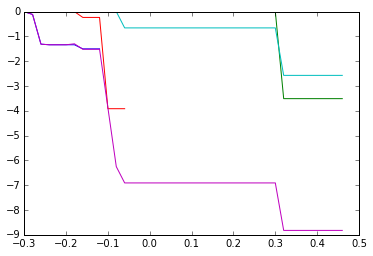

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))